# 多尺度目标检测



In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

img = d2l.plt.imread('../img/catdog.jpg')
h, w = img.shape[:2]
h, w

(561, 728)

在特征图（`fmap`）上生成锚框（`anchors`），每个单位（像素）作为锚框的中心

In [2]:
def display_anchors(fmap_w, fmap_h, s):
    d2l.set_figsize()
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))
    anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])
    bbox_scale = torch.tensor((w, h, w, h))
    d2l.show_bboxes(d2l.plt.imshow(img).axes,
                    anchors[0] * bbox_scale)

探测小目标

/home/d2l-worker/miniconda3/envs/d2l-zh-release-1/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


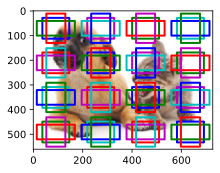

In [3]:
display_anchors(fmap_w=4, fmap_h=4, s=[0.15])

将特征图的高度和宽度减小一半，然后使用较大的锚框来检测较大的目标

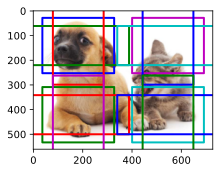

In [4]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])

将特征图的高度和宽度减小一半，然后将锚框的尺度增加到0.8

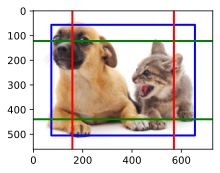

In [5]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])